## <b> Cài đặt các thư viện. </b>

In [ ]:
!pip install pandas openpyxl


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\huyle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd # Thư viện pandas vào để sử dụng các hàm tiện ích cho việc xử lý dữ liệu dạng bảng.
import matplotlib.pyplot as plt # Thư viện matplotlib để vẽ biểu đồ
import seaborn as sns # Thư viện seaborn để vẽ biểu đồ

## <b> 1. Tiền xử lí và chuẩn bị dữ liệu. </b>

In [ ]:
# Cài đặt dữ liệu vào dataframe và hiển thị dữ liệu
df = pd.read_csv("Global Superstore.csv")

### <b> 1.1. Lọc dữ liệu cho thị trường Mỹ. </b>

In [ ]:
# Lọc dữ liệu cho quốc gia "United States"
us_data = df[df['Country'] == 'United States']

# Tổng hợp DataFrame đã lọc
total_records = len(df)
us_records = len(us_data)
percentage = round(us_records / total_records * 100, 2)

print('Tổng số bản ghi: {}'.format(total_records))
print('Số bản ghi thị trường Mỹ: {}'.format(us_records))
print('Tỷ lệ dữ liệu thị trường Mỹ: {}%'.format(percentage))

# Lưu DataFrame đã lọc thành file CSV mới
us_data.to_csv('US_Data.csv', index=False)

Tổng số bản ghi: 51290
Số bản ghi thị trường Mỹ: 9994
Tỷ lệ dữ liệu thị trường Mỹ: 19.49%


### <b> 1.2. Xử lí dữ liệu bị trùng lặp, thiếu và chuẩn hóa. </b>

#### <b> 1.2.1. Xử lí dữ liệu bị trùng lặp. </b>

In [ ]:
# Đọc dữ liệu từ file CSV đã được lọc
us_data = pd.read_csv('US_Data.csv')

# Xác định các dòng trùng lặp
duplicates = us_data[us_data.duplicated()]

# In ra số lượng dòng trùng lặp
print("Số lượng dòng trùng lặp: {}".format(duplicates.shape[0]))

Số lượng dòng trùng lặp: 0


In [ ]:
# Trong trường hợp có dữ liệu bị trùng lặp ta xử lí như sau:
# Xóa các dòng trùng lặp, giữ lại dòng đầu tiên
# us_data.drop_duplicates(keep='first', inplace=True)

# Cập nhật lại index
# us_data.reset_index(drop=True, inplace=True)

# Lưu DataFrame đã xử lý vào file CSV mới
# us_data.to_csv('US_Data_Cleaned.csv', index=False)

#### <b> 1.2.2. Xử lí dữ liệu bị thiếu. </b>

In [ ]:
# Xác định các giá trị thiếu
missing_values = us_data.isnull().sum()

# In ra số lượng giá trị thiếu cho mỗi cột
print("Số lượng giá trị thiếu trong mỗi cột:")
print(missing_values)

# Nếu trong trường hợp có dữ liệu bị thiếu ta xử lý giá trị thiếu bằng các cách như sau:
# - Xóa các dòng có giá trị thiếu (phương pháp đơn giản, nhưng có thể mất dữ liệu)
# us_data.dropna(inplace=True)

# - Thay thế giá trị thiếu bằng giá trị trung bình, trung vị, hoặc giá trị xuất hiện nhiều nhất
# (phương pháp phức tạp hơn, nhưng bảo toàn dữ liệu)
# us_data['Postal Code'].fillna(us_data['Postal Code'].mode()[0], inplace=True)

# Lưu DataFrame đã xử lý vào file CSV mới
us_data.to_csv('US_Data_Cleaned.csv', index=False)

Số lượng giá trị thiếu trong mỗi cột:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


#### <b> 1.2.3. Xử lí dữ liệu ngoại lai. </b>

**Phát hiện ngoại lai:**
- Sử dụng biểu đồ Box Plot: Vẽ biểu đồ Box Plot cho các cột số để trực quan hóa phân bố dữ liệu và xác định các điểm ngoại lai.

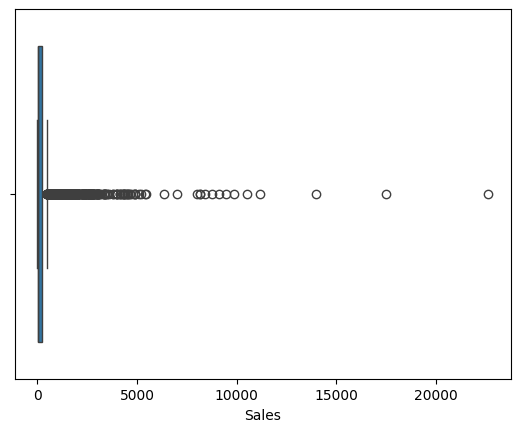

In [ ]:
# Vẽ biểu đồ Box Plot cho cột 'Sales'
sns.boxplot(x=us_data['Sales'])
plt.show()

- Sử dụng IQR: Tính toán khoảng cách giữa tứ phân vị (IQR) và xác định các điểm nằm ngoài khoảng [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] là ngoại lai.

In [ ]:
Q1 = us_data['Sales'].quantile(0.25)
Q3 = us_data['Sales'].quantile(0.75)
IQR = Q3 - Q1
# Xác định giới hạn trên và dưới
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = us_data[(us_data['Sales'] < lower_bound) | (us_data['Sales'] > upper_bound)]

**Xử lí ngoại lai:**
- Xóa: Loại bỏ các dòng chứa ngoại lai.

In [ ]:
us_data = us_data[(us_data['Sales'] >= lower_bound) & (us_data['Sales'] <= upper_bound)]

- Thay thế: Thay thế giá trị ngoại lai bằng giá trị khác, ví dụ:
    - Giá trị trung bình hoặc trung vị của cột.
    - Giá trị tại biên (lower_bound hoặc upper_bound).
    - Giá trị được dự đoán từ mô hình.

In [ ]:
# Thay thế bằng giá trị trung bình
us_data.loc[us_data['Sales'] < lower_bound, 'Sales'] = us_data['Sales'].mean()
us_data.loc[us_data['Sales'] > upper_bound, 'Sales'] = us_data['Sales'].mean()

Lưu dữ liệu đã xử lý

In [ ]:
us_data.to_csv('US_Data_Cleaned.csv', index=False)
# In ra DataFrame đã xử lý ngoại lai
print(us_data)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
234    35155  CA-2011-140816  12/20/2011  12/20/2011        Same Day   
255    37559  CA-2013-132479   9/25/2013   9/27/2013     First Class   
278    35714  CA-2014-112900   4/10/2014   4/13/2014    Second Class   
289    36361  CA-2014-122196   9/23/2014   9/25/2014     First Class   
309    33412  CA-2012-164882  10/31/2012  10/31/2012        Same Day   
...      ...             ...         ...         ...             ...   
9989   38414  CA-2011-143168  10/18/2011  10/23/2011    Second Class   
9990   31558  US-2014-155299    6/9/2014   6/13/2014  Standard Class   
9991   37361  CA-2012-111780  12/25/2012  12/30/2012    Second Class   
9992   35398  US-2014-102288   6/20/2014   6/24/2014  Standard Class   
9993   40470  US-2013-155768   12/2/2013   12/2/2013        Same Day   

     Customer ID       Customer Name      Segment        City       State  \
234     TC-21295       Toby Carlisle     Consumer    Thorn

### <b> 1.3. Chuẩn hóa giá trị chưa phù hợp thành định dạng phù hợp. </b>

In [ ]:
print(us_data.dtypes)  # Kiểm tra kiểu dữ liệu của từng cột

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object


In [ ]:
def create_features(df):
    # Convert 'Ship Date' and 'Order Date' to datetime objects
    df["Ship Date"] = pd.to_datetime(df["Ship Date"])
    df["Order Date"] = pd.to_datetime(df["Order Date"])
    df["Shipping Duration"] = (df["Ship Date"] - df["Order Date"]).dt.days  # Thời gian giao hàng
    df["Days Since Order"] = (pd.Timestamp.today() - df["Order Date"]).dt.days  # Số ngày từ ngày đặt hàng đến hiện tại
    df["Profit Margin"] = df["Profit"] / df["Sales"].replace(0, np.nan)  # Biên lợi nhuận
    df["Discount Rate"] = df["Discount"] / df["Sales"].replace(0, np.nan)  # Tỷ lệ giảm giá
    df["Avg Sales Per Quantity"] = df["Sales"] / df["Quantity"].replace(0, np.nan)  # Doanh thu trung bình mỗi sản phẩm
    return df
# Gọi hàm và gán lại giá trị cho us_data
us_data = create_features(us_data)

## <b> 2. Mô tả dữ liệu.

### <b> 2.1. Thống kê tổng quan thị trường

In [ ]:
# Hàm phân tích tổng quan thị trường
def analyze_market_overview(df):
    """Phân tích tổng quan thị trường"""
    overview = {
        "Số lượng đơn hàng": df["Order ID"].nunique(),
        "Tổng doanh số (USD)": df["Sales"].sum(),
        "Số lượng khách hàng": df["Customer ID"].nunique(),
        "Tổng lợi nhuận (USD)": df["Profit"].sum()
    }
    return overview

# Gọi hàm phân tích dữ liệu nước Mỹ
market_overview = analyze_market_overview(us_data)

# Hiển thị kết quả
print("Tổng quan thị trường Mỹ:")
for key, value in market_overview.items():
    print("{}: {}".format(key, value))

Tổng quan thị trường Mỹ:
Số lượng đơn hàng: 4725
Tổng doanh số (USD): 819718.0554000001
Số lượng khách hàng: 790
Tổng lợi nhuận (USD): 98850.42659999999


### <b> 2.2. Các phân tích thống kê cơ bản.

#### <b> 2.2.1. Phân tích các chỉ số kinh doanh theo danh mục sản phẩm.

In [ ]:
# Định dạng số để tránh ký tự \
pd.set_option("display.float_format", "{:.2f}".format)

def filter_country_data(df, country):
    """Lọc dữ liệu theo quốc gia được chỉ định"""
    return df[df["Country"] == country].copy()

def analyze_business_category_metrics(df):
    """Phân tích các chỉ số kinh doanh theo category"""
    category_analysis = df.groupby("Category")[["Sales", "Profit", "Quantity", "Discount"]].sum()
    category_analysis["Profit Ratio"] = (category_analysis["Profit"] / category_analysis["Sales"]).round(2)
    category_analysis["Average Order Value"] = (category_analysis["Sales"] / df.groupby("Category")["Order ID"].nunique()).round(2)
    category_analysis["Order Count"] = df.groupby("Category")["Order ID"].nunique()
    return category_analysis

# Phân tích theo category
category_analysis = analyze_business_category_metrics(us_data)
print("\nPhân tích theo Category:")
print(category_analysis.to_string())


Phân tích theo Category:
                    Sales   Profit  Quantity  Discount  Profit Ratio  Average Order Value  Order Count
Category                                                                                              
Furniture       247877.70 -2714.54      5520    291.59         -0.01               173.22         1431
Office Supplies 343425.00 66179.54     21388    913.80          0.19                94.56         3632
Technology      228415.35 35385.42      4945    185.80          0.15               183.17         1247


#### <b> 2.2.2. Phân tích các chỉ số kinh doanh theo phân khúc khách hàng.

In [ ]:
def analyze_business_segment_metrics(df):
    """Phân tích các chỉ số kinh doanh theo Segment, ShipMode, OrderPriority"""
    segment_analysis = df.groupby("Segment")[["Sales", "Profit", "Quantity", "Discount"]].sum()
    ship_mode_analysis = df.groupby("Ship Mode")[["Sales", "Profit", "Quantity", "Discount"]].sum()
    order_priority_analysis = df.groupby("Order Priority")[["Sales", "Profit", "Quantity", "Discount"]].sum()

    return segment_analysis, ship_mode_analysis, order_priority_analysis

def analyze_customer_metrics(df):
    """Phân tích các chỉ số kinh doanh theo khách hàng"""
    unique_customers = df["Customer ID"].nunique()
    avg_sales_per_customer = df.groupby("Customer ID")["Sales"].mean().mean()
    avg_profit_per_customer = df.groupby("Customer ID")["Profit"].mean().mean()

    return {
        "Total Unique Customers": unique_customers,
        "Average Sales per Customer": avg_sales_per_customer,
        "Average Profit per Customer": avg_profit_per_customer
    }

def analyze_order_trends(df):
    """Phân tích số lượng đơn hàng theo năm"""
    # Ensure 'Order Date' is in datetime format
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
    order_trends = df.groupby(df["Order Date"].dt.year).size()
    return order_trends

# Phân tích theo segment, ship mode, order priority
segment_analysis, ship_mode_analysis, order_priority_analysis = analyze_business_segment_metrics(us_data)
print("\nPhân tích theo Segment:")
print(segment_analysis)
print("\nPhân tích theo Ship Mode:")
print(ship_mode_analysis)
print("\nPhân tích theo Order Priority:")
print(order_priority_analysis)

# Phân tích theo khách hàng
customer_analysis = analyze_customer_metrics(us_data)
print("\nPhân tích về Khách Hàng:")
print(customer_analysis)

# Phân tích theo năm
order_trends = analyze_order_trends(us_data)
print("\nXu hướng số lượng đơn hàng theo năm:")
print(order_trends)


Phân tích theo Segment:
                Sales   Profit  Quantity  Discount
Segment                                           
Consumer    437711.08 49390.05     16599    735.66
Corporate   240011.94 28802.63      9612    424.17
Home Office 141995.03 20657.74      5642    231.36

Phân tích theo Ship Mode:
                   Sales   Profit  Quantity  Discount
Ship Mode                                            
First Class    124222.37 13724.63      4808    224.65
Same Day        43995.83  5609.30      1650     72.90
Second Class   161053.47 20990.88      6153    239.69
Standard Class 490446.38 58525.62     19242    853.95

Phân tích theo Order Priority:
                   Sales   Profit  Quantity  Discount
Order Priority                                       
Critical        69154.66  8611.97      2419    102.34
High           247829.35 31681.29      9598    417.91
Low             34543.36  3487.87      1453     68.00
Medium         468190.69 55069.30     18383    802.94

Phân tích về

## <b> 3. Trực quan hóa dữ liệu </b>

### <b> 3.1. Xu hướng theo thời gian của thị trường. </b>

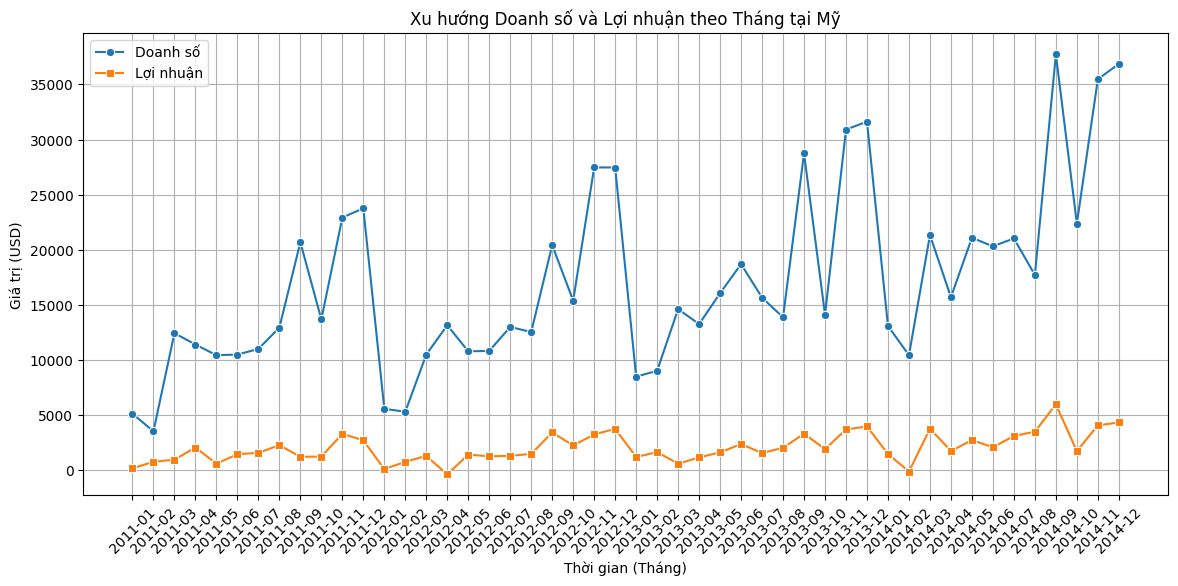

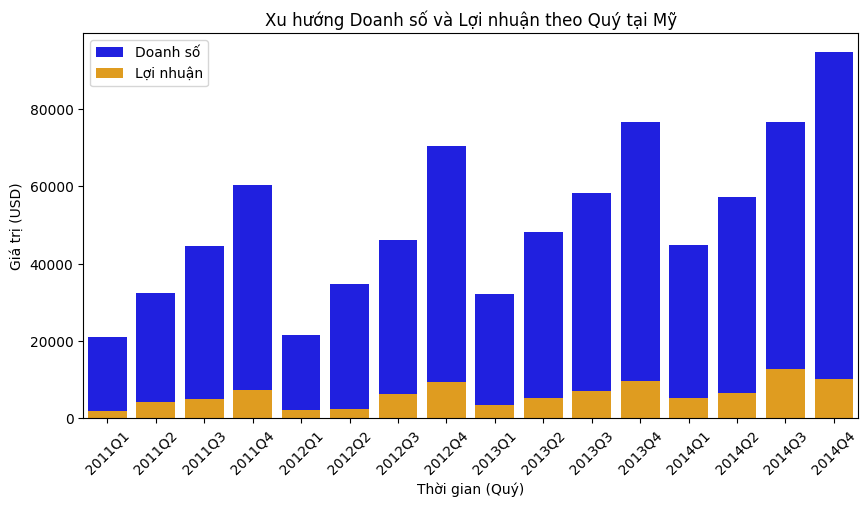

In [ ]:
# Chuyển đổi cột "Order Date" thành kiểu datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')

# Thêm cột tháng và quý
us_data["Year-Month"] = us_data["Order Date"].dt.to_period("M")
us_data["Quarter"] = us_data["Order Date"].dt.to_period("Q")

# Tổng hợp doanh số và lợi nhuận theo tháng
monthly_data = us_data.groupby("Year-Month")[["Sales", "Profit"]].sum().reset_index()
monthly_data["Year-Month"] = monthly_data["Year-Month"].astype(str)

# Tổng hợp doanh số và lợi nhuận theo quý
quarterly_data = us_data.groupby("Quarter")[["Sales", "Profit"]].sum().reset_index()
quarterly_data["Quarter"] = quarterly_data["Quarter"].astype(str)

# Vẽ biểu đồ theo tháng
plt.figure(figsize=(14, 6))
sns.lineplot(x="Year-Month", y="Sales", data=monthly_data, label="Doanh số", marker="o")
sns.lineplot(x="Year-Month", y="Profit", data=monthly_data, label="Lợi nhuận", marker="s")

plt.xticks(rotation=45)
plt.xlabel("Thời gian (Tháng)")
plt.ylabel("Giá trị (USD)")
plt.title("Xu hướng Doanh số và Lợi nhuận theo Tháng tại Mỹ")
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ theo quý
plt.figure(figsize=(10, 5))
sns.barplot(x="Quarter", y="Sales", data=quarterly_data, label="Doanh số", color='blue')
sns.barplot(x="Quarter", y="Profit", data=quarterly_data, label="Lợi nhuận", color='orange')

plt.xlabel("Thời gian (Quý)")
plt.ylabel("Giá trị (USD)")
plt.title("Xu hướng Doanh số và Lợi nhuận theo Quý tại Mỹ")
plt.legend()
plt.xticks(rotation=45)
plt.show()

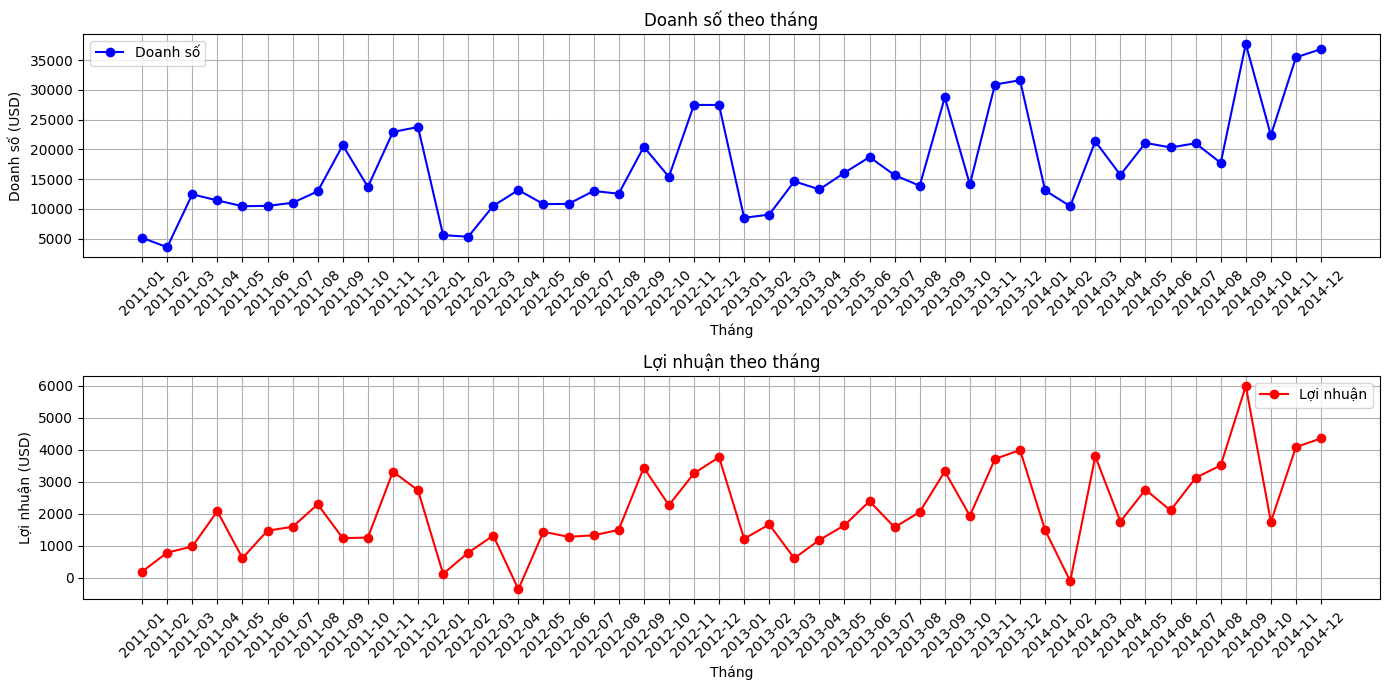

In [ ]:
# Chuyển đổi cột 'Order Date' sang kiểu datetime
us_data['Order Date'] = pd.to_datetime(us_data['Order Date'])

# Trích xuất tháng và năm từ cột 'Order Date'
us_data['YearMonth'] = us_data['Order Date'].dt.to_period('M')

# Tính tổng doanh số và lợi nhuận theo từng tháng
monthly_sales_profit = us_data.groupby('YearMonth').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Chuyển đổi 'YearMonth' sang kiểu string để vẽ biểu đồ
monthly_sales_profit['YearMonth'] = monthly_sales_profit['YearMonth'].astype(str)

# Vẽ biểu đồ doanh số và lợi nhuận theo tháng
plt.figure(figsize=(14, 7))

# Biểu đồ doanh số
plt.subplot(2, 1, 1)
plt.plot(monthly_sales_profit['YearMonth'], monthly_sales_profit['Sales'], marker='o', color='b', label='Doanh số')
plt.title('Doanh số theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh số (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Biểu đồ lợi nhuận
plt.subplot(2, 1, 2)
plt.plot(monthly_sales_profit['YearMonth'], monthly_sales_profit['Profit'], marker='o', color='r', label='Lợi nhuận')
plt.title('Lợi nhuận theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Lợi nhuận (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### <b> 3.2. Thống kê tổng quan thị trường. </b>

C:\Users\huyle\AppData\Local\Temp\ipykernel_65756\3895383218.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="City", data=city_performance.head(20), palette="viridis")  # Top 20 thành phố
C:\Users\huyle\AppData\Local\Temp\ipykernel_65756\3895383218.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="City", data=city_performance.head(20), palette="magma")  # Top 20 thành phố


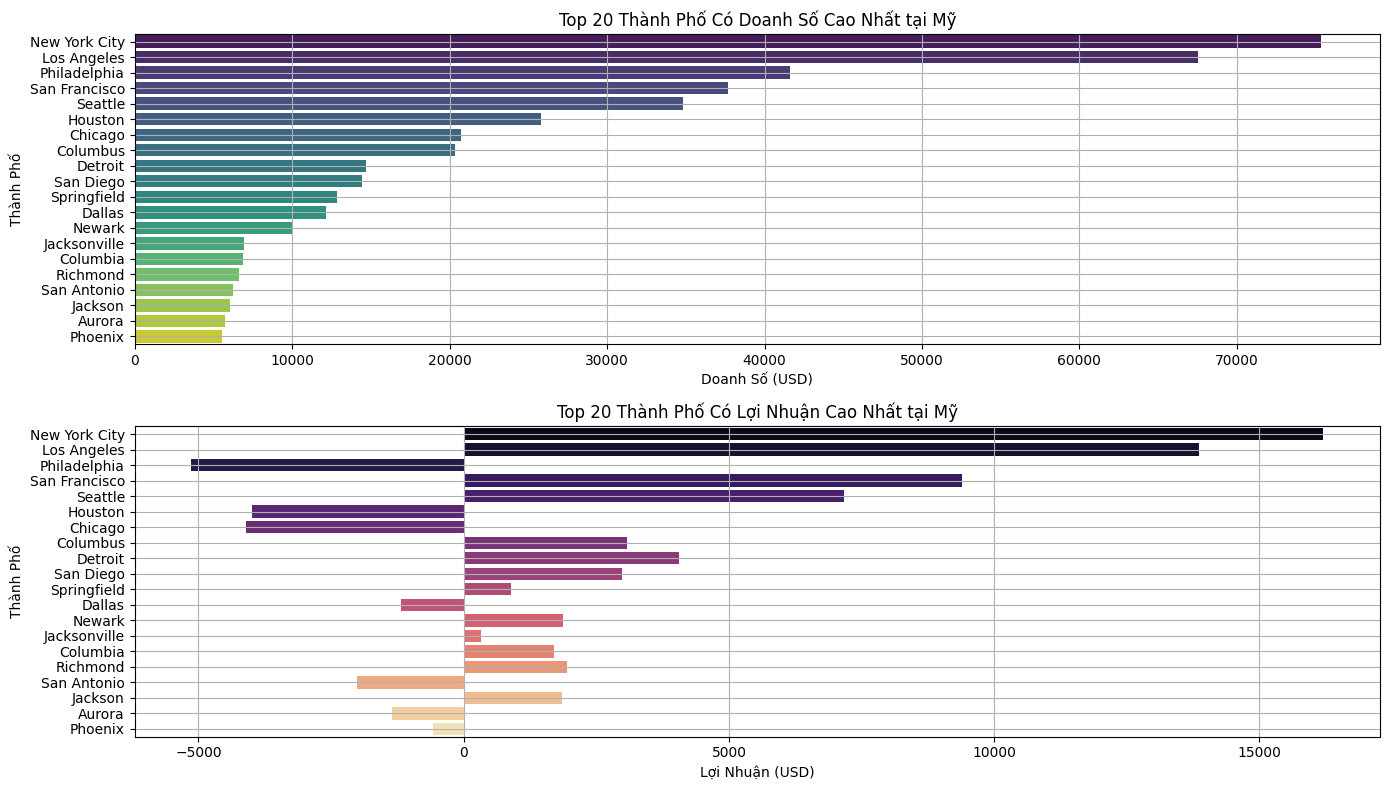

In [ ]:
# Tính tổng doanh số và lợi nhuận theo từng thành phố
city_performance = us_data.groupby("City").agg({
    "Sales": "sum",
    "Profit": "sum",
    "Order ID": "nunique"  # Số lượng đơn hàng
}).reset_index()

# Sắp xếp dữ liệu theo doanh số giảm dần
city_performance = city_performance.sort_values(by="Sales", ascending=False)

# Trực quan hóa doanh số và lợi nhuận theo thành phố
plt.figure(figsize=(14, 8))

# Biểu đồ doanh số theo thành phố
plt.subplot(2, 1, 1)
sns.barplot(x="Sales", y="City", data=city_performance.head(20), palette="viridis")  # Top 20 thành phố
plt.title("Top 20 Thành Phố Có Doanh Số Cao Nhất tại Mỹ")
plt.xlabel("Doanh Số (USD)")
plt.ylabel("Thành Phố")
plt.grid(True)

# Biểu đồ lợi nhuận theo thành phố
plt.subplot(2, 1, 2)
sns.barplot(x="Profit", y="City", data=city_performance.head(20), palette="magma")  # Top 20 thành phố
plt.title("Top 20 Thành Phố Có Lợi Nhuận Cao Nhất tại Mỹ")
plt.xlabel("Lợi Nhuận (USD)")
plt.ylabel("Thành Phố")
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\huyle\AppData\Local\Temp\ipykernel_65756\2473151913.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="Region", data=region_performance, palette="coolwarm")
C:\Users\huyle\AppData\Local\Temp\ipykernel_65756\2473151913.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="Region", data=region_performance, palette="coolwarm")


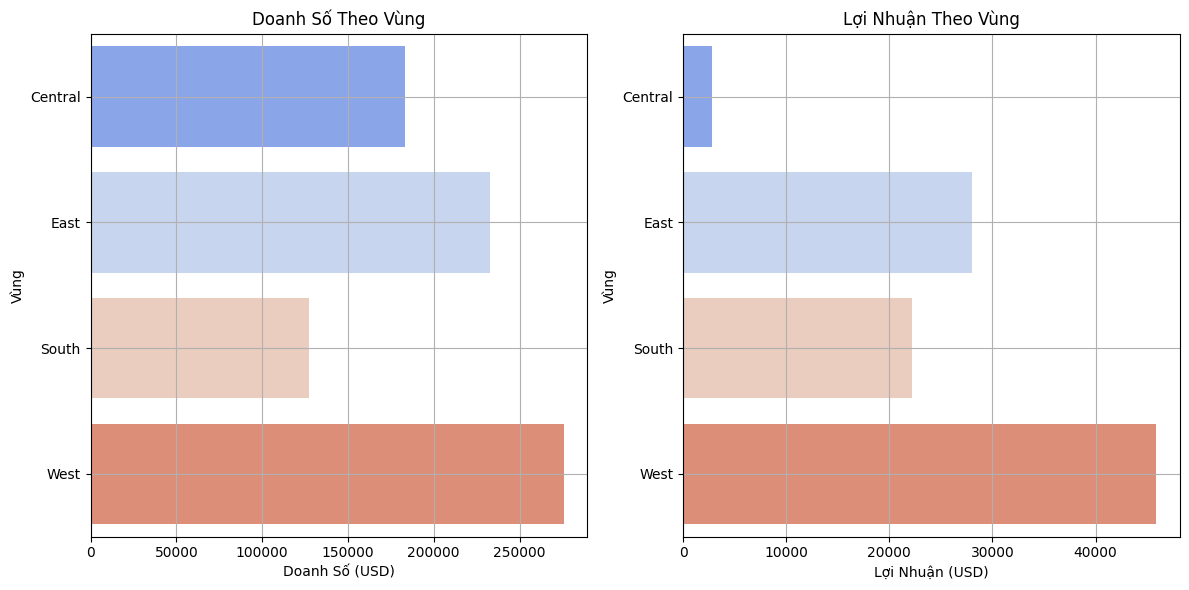

In [ ]:
# Tính tổng doanh số và lợi nhuận theo từng vùng
region_performance = us_data.groupby("Region").agg({
    "Sales": "sum",
    "Profit": "sum",
    "Order ID": "nunique"  # Số lượng đơn hàng
}).reset_index()

# Trực quan hóa doanh số và lợi nhuận theo vùng
plt.figure(figsize=(12, 6))

# Biểu đồ doanh số theo vùng
plt.subplot(1, 2, 1)
sns.barplot(x="Sales", y="Region", data=region_performance, palette="coolwarm")
plt.title("Doanh Số Theo Vùng")
plt.xlabel("Doanh Số (USD)")
plt.ylabel("Vùng")
plt.grid(True)

# Biểu đồ lợi nhuận theo vùng
plt.subplot(1, 2, 2)
sns.barplot(x="Profit", y="Region", data=region_performance, palette="coolwarm")
plt.title("Lợi Nhuận Theo Vùng")
plt.xlabel("Lợi Nhuận (USD)")
plt.ylabel("Vùng")
plt.grid(True)

plt.tight_layout()
plt.show()

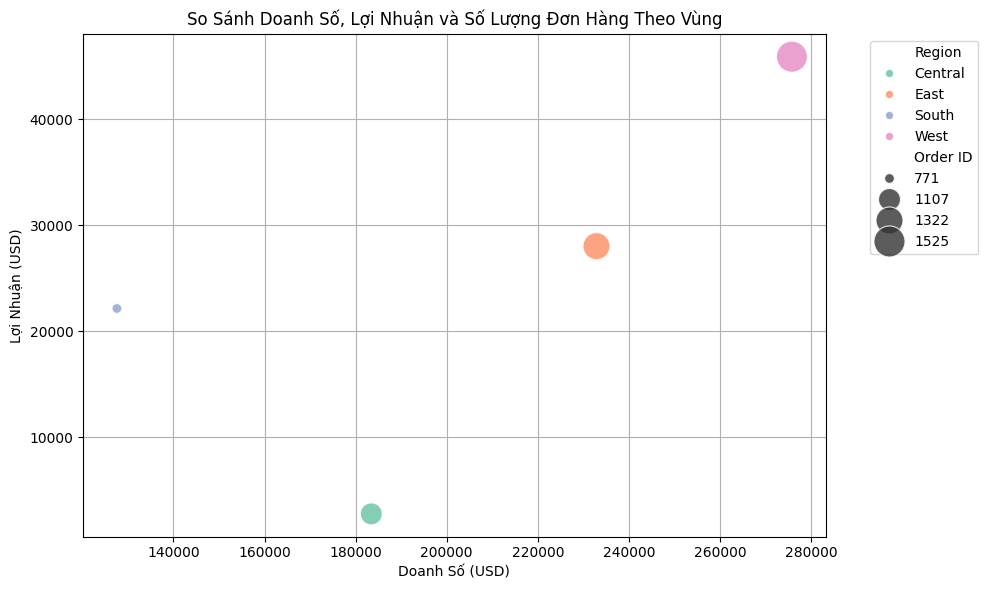

In [ ]:
# Bubble chart để so sánh doanh số, lợi nhuận và số lượng đơn hàng
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Sales",
    y="Profit",
    size="Order ID",
    sizes=(50, 500),  # Kích thước của bubble
    hue="Region",  # Màu sắc theo vùng
    data=region_performance,
    palette="Set2",
    alpha=0.8
)
plt.title("So Sánh Doanh Số, Lợi Nhuận và Số Lượng Đơn Hàng Theo Vùng")
plt.xlabel("Doanh Số (USD)")
plt.ylabel("Lợi Nhuận (USD)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\huyle\AppData\Local\Temp\ipykernel_65756\2832409490.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="Category", data=category_performance, palette="viridis")
C:\Users\huyle\AppData\Local\Temp\ipykernel_65756\2832409490.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="Category", data=category_performance, palette="magma")


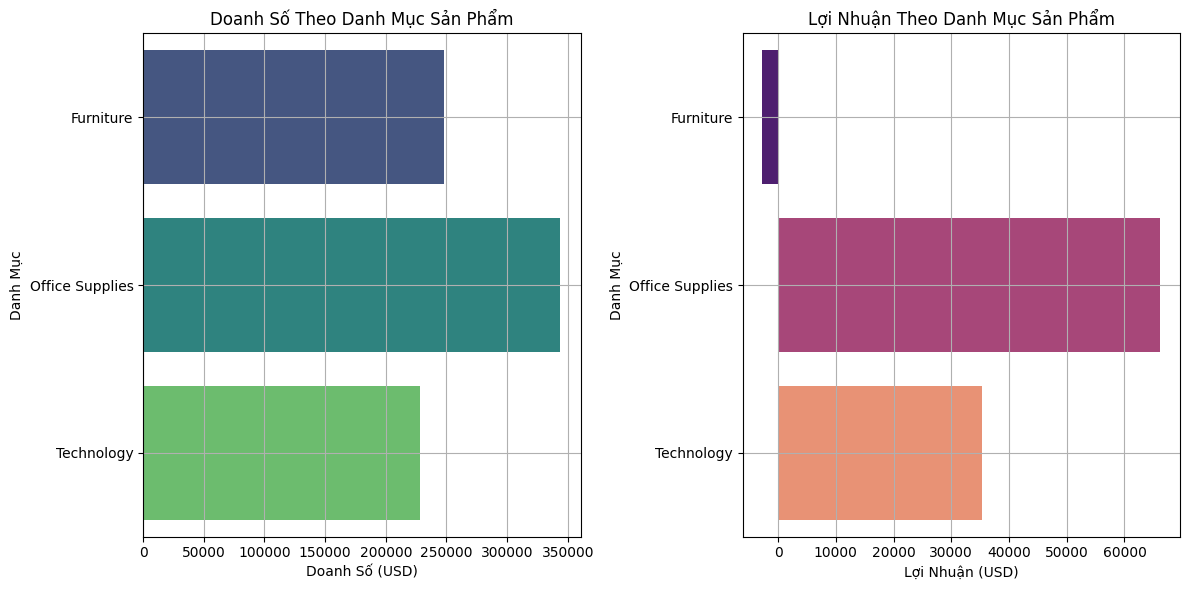

In [ ]:
# Tính tổng doanh số và lợi nhuận theo từng danh mục sản phẩm
category_performance = us_data.groupby("Category").agg({
    "Sales": "sum",
    "Profit": "sum",
    "Order ID": "nunique"  # Số lượng đơn hàng
}).reset_index()

# Trực quan hóa doanh số và lợi nhuận theo danh mục sản phẩm
plt.figure(figsize=(12, 6))

# Biểu đồ doanh số theo danh mục
plt.subplot(1, 2, 1)
sns.barplot(x="Sales", y="Category", data=category_performance, palette="viridis")
plt.title("Doanh Số Theo Danh Mục Sản Phẩm")
plt.xlabel("Doanh Số (USD)")
plt.ylabel("Danh Mục")
plt.grid(True)

# Biểu đồ lợi nhuận theo danh mục
plt.subplot(1, 2, 2)
sns.barplot(x="Profit", y="Category", data=category_performance, palette="magma")
plt.title("Lợi Nhuận Theo Danh Mục Sản Phẩm")
plt.xlabel("Lợi Nhuận (USD)")
plt.ylabel("Danh Mục")
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\huyle\AppData\Local\Temp\ipykernel_65756\2858251990.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="Segment", data=segment_performance, palette="coolwarm")
C:\Users\huyle\AppData\Local\Temp\ipykernel_65756\2858251990.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="Segment", data=segment_performance, palette="coolwarm")


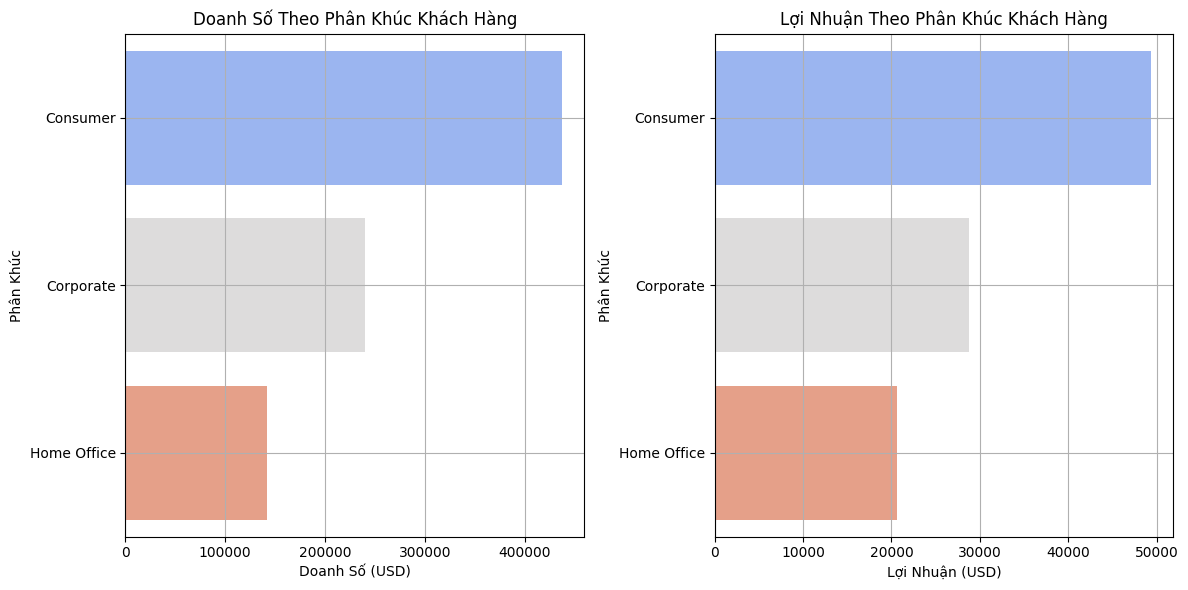

In [ ]:
# Tính tổng doanh số và lợi nhuận theo từng phân khúc khách hàng
segment_performance = us_data.groupby("Segment").agg({
    "Sales": "sum",
    "Profit": "sum",
    "Order ID": "nunique"  # Số lượng đơn hàng
}).reset_index()

# Trực quan hóa doanh số và lợi nhuận theo phân khúc khách hàng
plt.figure(figsize=(12, 6))

# Biểu đồ doanh số theo phân khúc
plt.subplot(1, 2, 1)
sns.barplot(x="Sales", y="Segment", data=segment_performance, palette="coolwarm")
plt.title("Doanh Số Theo Phân Khúc Khách Hàng")
plt.xlabel("Doanh Số (USD)")
plt.ylabel("Phân Khúc")
plt.grid(True)

# Biểu đồ lợi nhuận theo phân khúc
plt.subplot(1, 2, 2)
sns.barplot(x="Profit", y="Segment", data=segment_performance, palette="coolwarm")
plt.title("Lợi Nhuận Theo Phân Khúc Khách Hàng")
plt.xlabel("Lợi Nhuận (USD)")
plt.ylabel("Phân Khúc")
plt.grid(True)

plt.tight_layout()
plt.show()

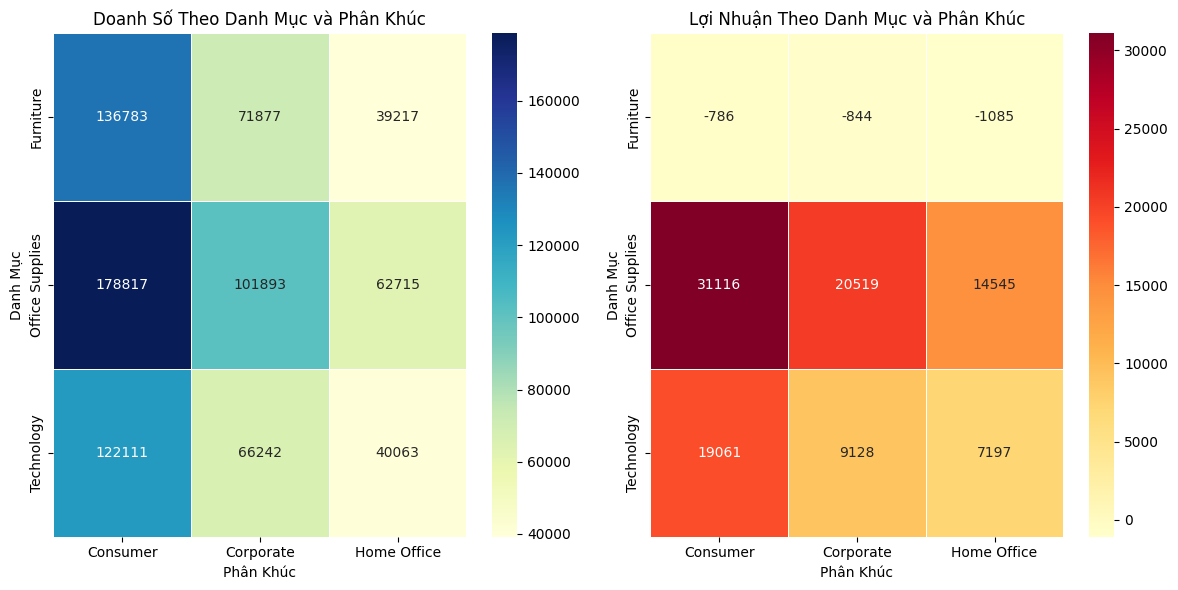

In [ ]:
# Tính tổng doanh số và lợi nhuận theo danh mục và phân khúc
category_segment_performance = us_data.groupby(["Category", "Segment"]).agg({
    "Sales": "sum",
    "Profit": "sum"
}).reset_index()

# Pivot dữ liệu để tạo heatmap
sales_pivot = category_segment_performance.pivot(index="Category", columns="Segment", values="Sales")
profit_pivot = category_segment_performance.pivot(index="Category", columns="Segment", values="Profit")

# Chuyển đổi kiểu dữ liệu
sales_pivot = sales_pivot.apply(pd.to_numeric, errors='coerce')
profit_pivot = profit_pivot.apply(pd.to_numeric, errors='coerce')

# Thay thế NaN bằng 0
sales_pivot = sales_pivot.fillna(0)
profit_pivot = profit_pivot.fillna(0)

# Trực quan hóa bằng heatmap
plt.figure(figsize=(12, 6))

# Heatmap doanh số
plt.subplot(1, 2, 1)
sns.heatmap(sales_pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Doanh Số Theo Danh Mục và Phân Khúc")
plt.xlabel("Phân Khúc")
plt.ylabel("Danh Mục")

# Heatmap lợi nhuận
plt.subplot(1, 2, 2)
sns.heatmap(profit_pivot, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.5)
plt.title("Lợi Nhuận Theo Danh Mục và Phân Khúc")
plt.xlabel("Phân Khúc")
plt.ylabel("Danh Mục")

plt.tight_layout()
plt.show()

## <b> 4. Phân tích chuyên sâu, đề xuất. </b>

### <b> 4.1. Phân tích chuyên sâu

In [ ]:
# Đọc dữ liệu từ file CSV đã được làm sạch
df = pd.read_csv('US_Data_Cleaned.csv')

# Chuyển đổi cột 'Order Date' thành kiểu datetime nếu cần
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Tính toán các giá trị tổng quan
total_orders = len(df)
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
num_customers = df['Customer ID'].nunique()
num_products = df['Product ID'].nunique()  # Sửa thành 'Product ID' để đếm số sản phẩm

# Thống kê theo tháng
monthly_stats = df.groupby(df['Order Date'].dt.month)[['Sales', 'Quantity']].sum()

# Phân tích theo category
category_analysis = df.groupby('Category')[['Sales', 'Profit', 'Quantity']].sum()
category_analysis['Profit Ratio'] = (category_analysis['Profit'] / category_analysis['Sales']) * 100

# Phân tích theo segment
segment_analysis = df.groupby('Segment')[['Sales', 'Profit', 'Quantity', 'Discount']].sum()
segment_analysis['Profit Ratio'] = (segment_analysis['Profit'] / segment_analysis['Sales']) * 100

# In kết quả
print('Tổng số đơn hàng: {}'.format(total_orders))
print('Tổng doanh số: {}'.format(total_sales))
print('Tổng lợi nhuận: {}'.format(total_profit))
print('Số khách hàng: {}'.format(num_customers))
print('Số sản phẩm: {}'.format(num_products))
# print(f'Thời gian xử lý đơn hàng trung bình: {avg_processing_time}')
# In ra sau khi tính toán

print('\nPhân tích theo category:')
print(category_analysis)

print('\nPhân tích theo segment:')
print(segment_analysis)

print('\nThống kê theo tháng:')
print(monthly_stats)

Tổng số đơn hàng: 8827
Tổng doanh số: 819718.0554000001
Tổng lợi nhuận: 98850.42659999999
Số khách hàng: 790
Số sản phẩm: 1769

Phân tích theo category:
                    Sales   Profit  Quantity  Profit Ratio
Category                                                  
Furniture       247877.70 -2714.54      5520         -1.10
Office Supplies 343425.00 66179.54     21388         19.27
Technology      228415.35 35385.42      4945         15.49

Phân tích theo segment:
                Sales   Profit  Quantity  Discount  Profit Ratio
Segment                                                         
Consumer    437711.08 49390.05     16599    735.66         11.28
Corporate   240011.94 28802.63      9612    424.17         12.00
Home Office 141995.03 20657.74      5642    231.36         14.55

Thống kê theo tháng:
               Sales  Quantity
Order Date                    
1           32352.11      1289
2           28371.27       953
3           58948.25      2095
4           53573.81     

### <b> 4.2. Đề xuất giải pháp, mô tả chi tiết, phương pháp tiếp cận

**Đề xuất giải pháp kinh doanh dựa trên dữ liệu**

a. Vấn đề cần giải quyết
- Làm thế nào để tối ưu hóa danh mục sản phẩm theo mùa nhằm tăng doanh thu và lợi nhuận?

b. Phân tích dữ liệu
- Dữ liệu từ Global Superstore cho thấy doanh số biến động theo mùa.
- Mùa cao điểm: Tháng 8-9 (chuẩn bị năm học mới) và tháng 11-12 (Black Friday, Christmas).
- Mùa thấp điểm: Tháng 2-4, doanh số giảm rõ rệt.

c. Giải pháp đề xuất
- Tập trung vào các category có profit ratio cao
    - Đẩy mạnh quảng bá và nhập hàng vào mùa cao điểm để tối ưu lợi nhuận.
- Điều chỉnh portfolio sản phẩm theo mùa
    - Tháng 8-9: Đẩy mạnh văn phòng phẩm.
    - Tháng 11-12: Đẩy mạnh đồ công nghệ, nội thất (doanh số tăng mạnh).
    - Tháng 2-4: Áp dụng chiến lược giảm giá hoặc bán combo sản phẩm để kích cầu.
- Phát triển các gói sản phẩm theo từng phân khúc
    - Tạo combo sản phẩm phù hợp với từng đối tượng khách hàng.
    - Ví dụ: Combo "Back to School" vào tháng 8-9 với đồ dùng văn phòng phẩm.

**Phương pháp tiếp cận**

a. Phân tích tỷ lệ lợi nhuận theo danh mục sản phẩm
- Sử dụng dữ liệu Profit (Lợi nhuận) và Sales (Doanh số) để tính Profit Ratio theo công thức: Profit Ratio= Profit\Sales
- Xếp hạng các danh mục sản phẩm theo Profit Ratio để xác định những danh mục mang lại lợi nhuận cao nhất.

b. Đưa ra đề xuất chiến lược dựa trên dữ liệu
- Danh mục có lợi nhuận cao → Tăng cường nhập hàng, chạy quảng cáo, ưu tiên trưng bày.
- Danh mục có lợi nhuận thấp → Xem xét giảm giá, tối ưu chi phí sản xuất, hoặc loại bỏ khỏi danh mục.

**Phân tích dữ liệu bằng Python**

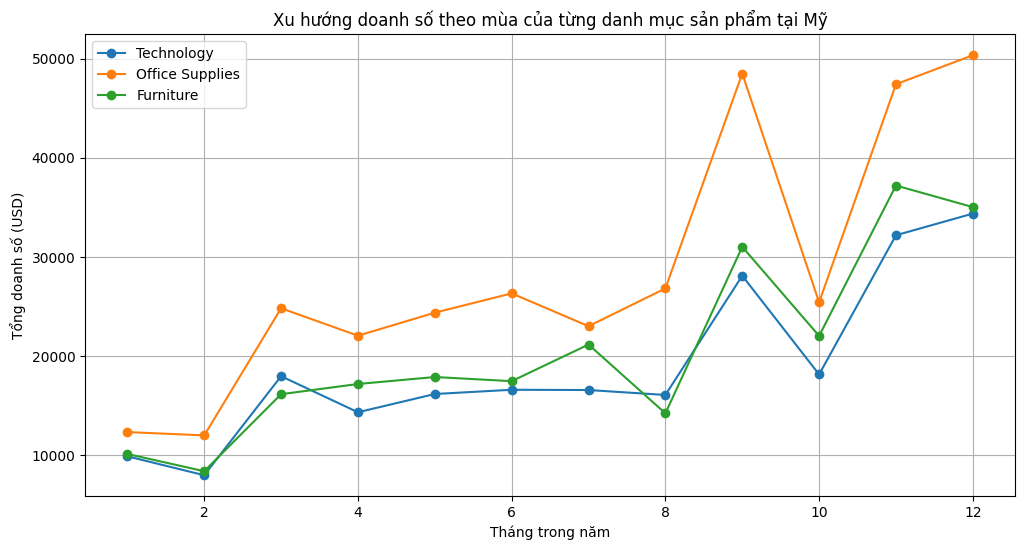

In [ ]:
import pandas as pd # Thư viện pandas vào để sử dụng các hàm tiện ích cho việc xử lý dữ liệu dạng bảng.
import matplotlib.pyplot as plt # Thư viện matplotlib để vẽ biểu đồ
# Vẽ biểu đồ doanh số theo mùa của từng danh mục sản phẩm
us_data['Order Month'] = pd.to_datetime(us_data['Order Date']).dt.month

seasonal_trend = us_data.groupby(['Category', 'Order Month'])['Sales'].sum().reset_index()

# Vẽ biểu đồ doanh số theo mùa của từng danh mục sản phẩm
plt.figure(figsize=(12, 6))
for category in us_data["Category"].unique():  # Lặp qua từng danh mục sản phẩm
    plt.plot(seasonal_trend[seasonal_trend["Category"] == category]["Order Month"],
             seasonal_trend[seasonal_trend["Category"] == category]["Sales"],
             marker='o', label=category)

plt.xlabel("Tháng trong năm")
plt.ylabel("Tổng doanh số (USD)")
plt.title("Xu hướng doanh số theo mùa của từng danh mục sản phẩm tại Mỹ")
plt.legend()
plt.grid(True)
plt.show()